In [6]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

%matplotlib inline

In [7]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [8]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.shape

(303, 14)

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
print(df.groupby(['sex']).size()) # 1= Male 0 =female

sex
0     96
1    207
dtype: int64


In [15]:
print(df.groupby(["output"]).size())

output
0    138
1    165
dtype: int64


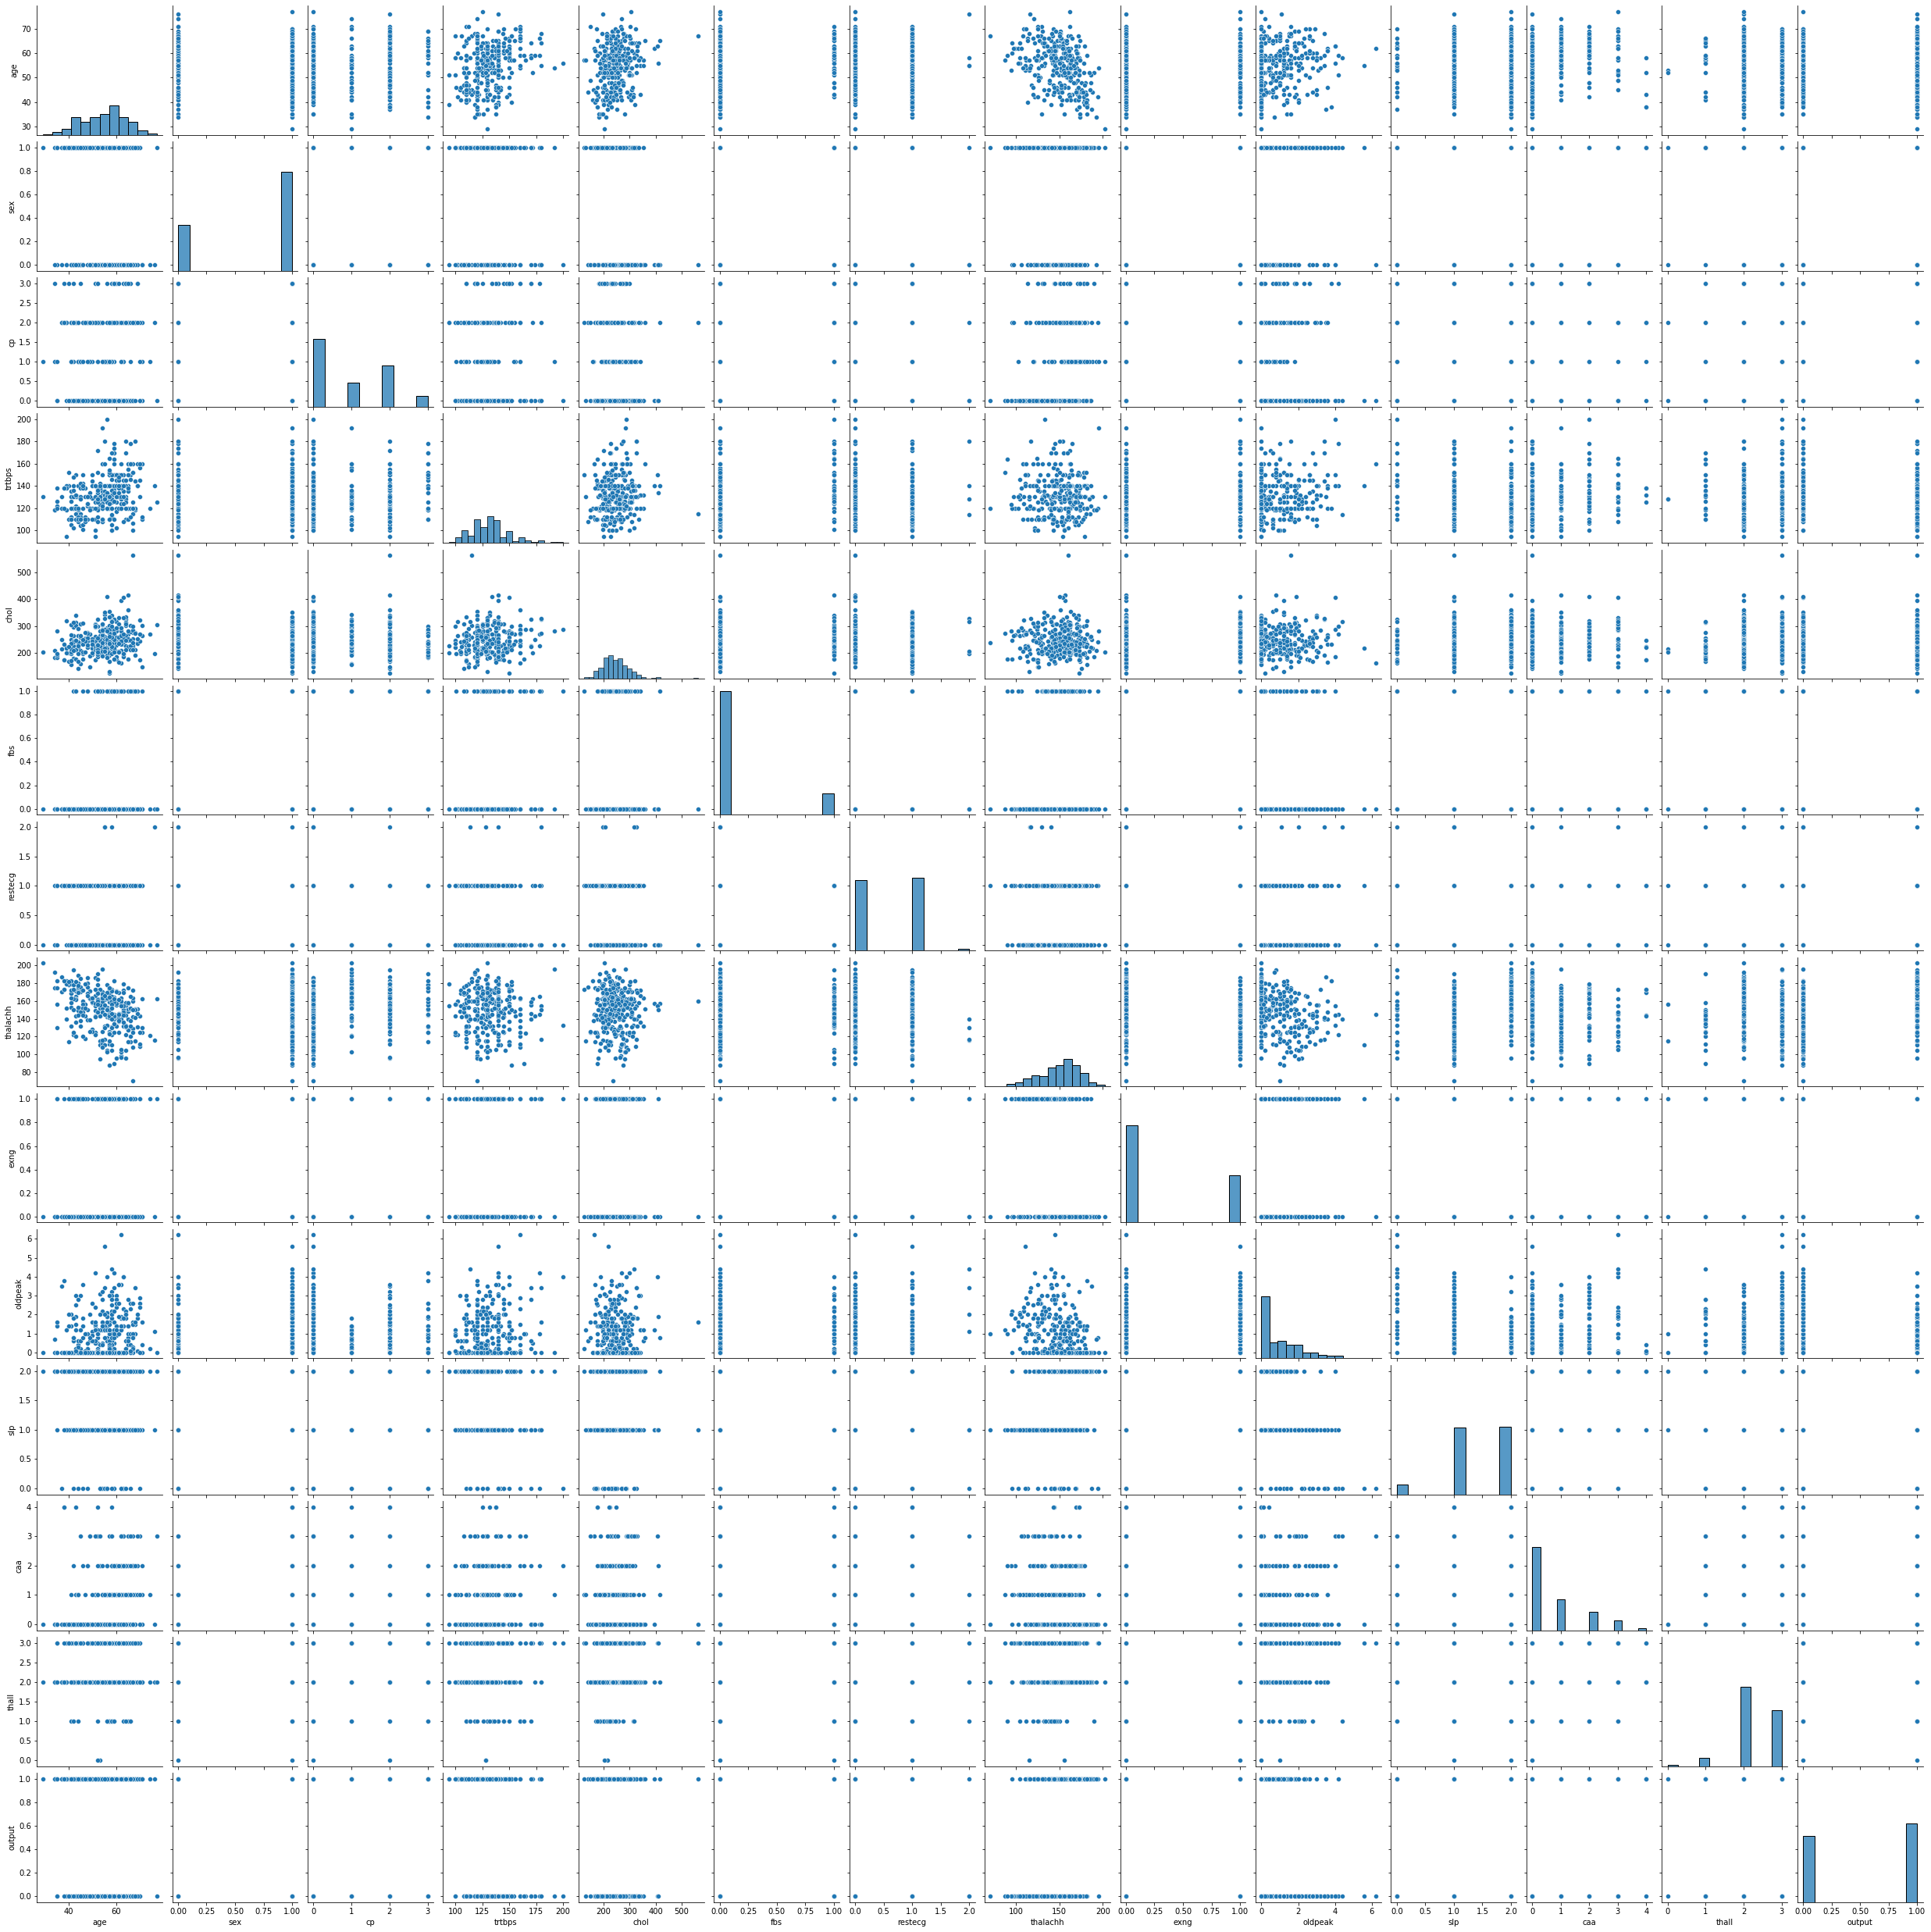

In [16]:
sns.pairplot(df)

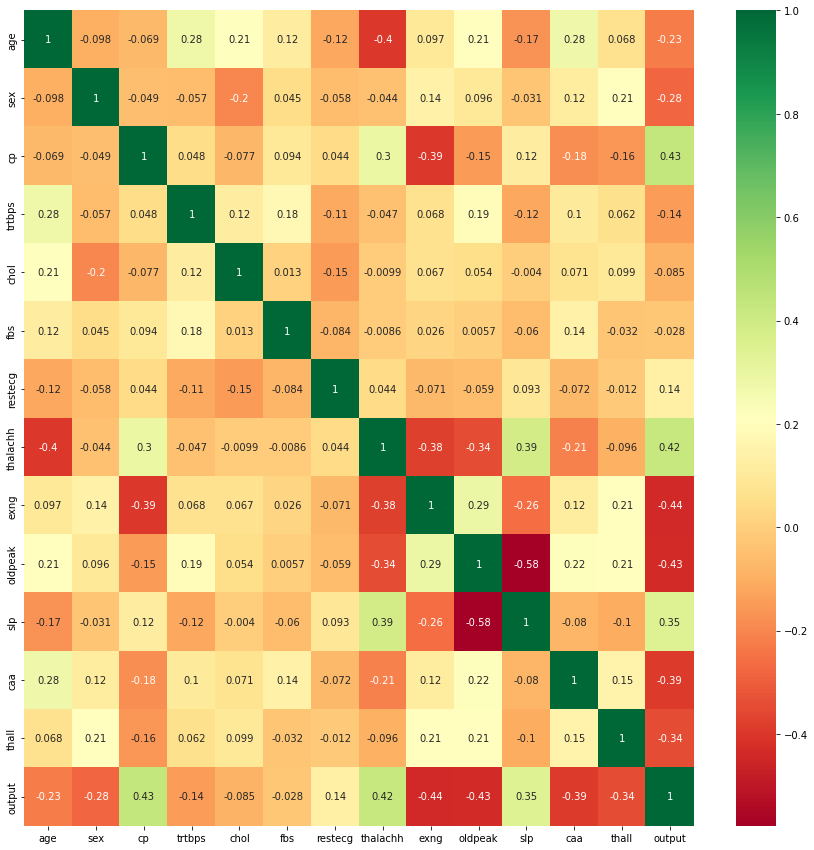

In [17]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heatmap
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

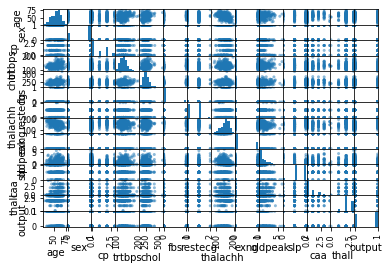

In [18]:
#plot scatter matrix
scatter_matrix(df)
plt.show()

In [19]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [20]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

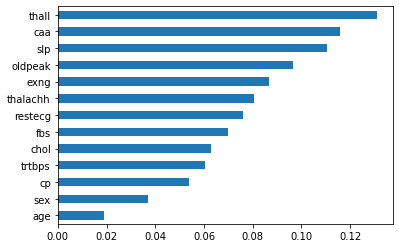

In [22]:
### Feature importance
fmodel = ExtraTreesClassifier()
fmodel.fit(X,y)
feat_importances = pd.Series(sorted(fmodel.feature_importances_), index= X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [23]:
#Data preparation
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

In [24]:
#model training
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)

In [25]:
model =  LogisticRegression(C=0.472, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
X_train, X_test, y_train, y_test = train_test_split(standardX, y, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=0.472, class_weight='balanced', max_iter=1000,
                   random_state=123)

In [26]:
#MOdel evaluation
results = cross_val_score(model, standardX, y, cv=kfold)
print("Accuracy:",round(results.mean()*100,3),"%")

Accuracy: 83.828 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


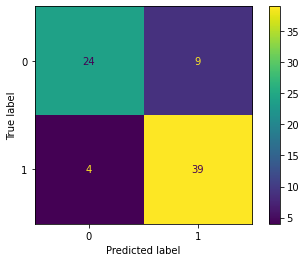

In [27]:
# Confusion Matrix
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

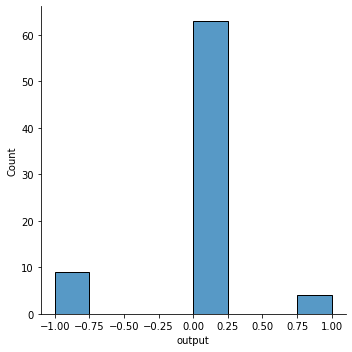

In [28]:
predictions = model.predict(X_test)
sns.displot(y_test- predictions)

In [29]:
file = open('tuned_model.pkl','wb')
pickle.dump(model,file)